# Galaksi, Yıldız, Kuasar Sınıflaması

# Makine Öğrenmesi

Makine öğrenmesi yapay zekanın (AI) bir alt kümesidir. Bilgisayarları verilerden öğrenmeyi öğretmeye ve bunu yapmak için açıkça programlanmak yerine deneyimle geliştirmeye odaklanır. Makine öğrenmesinde algoritmalar büyük veri kümelerinde desenleri ve korelasyonları bulmak ve bu analize dayalı en iyi kararları ve tahminleri yapmak için eğitilir. Makine öğrenmesi uygulamaları kullanımla gelişir ve daha fazla veri erişimi olduğunda daha doğru hale gelir.

## Astronomi'de Makine Öğrenmesi

Astronomik veri olarak tanımlanan veriler gökcisimlerinin bünyesel temel parametreleri, gözlem yoluyla elde edilen gözlemsel/deneysel nicelikleri ve sınıflandırma verileridir. 

Verilerin değerlendirilmesinde kullanılan makine öğrenme yöntemleri denetimli öğrenme (bir insan tarafından veriye öğretme ya da model yoluyla verinin kavranması) ve denetimsiz öğrenme (herhangi bir öğretme durumu olmadan algoritmanın kendi kendine veriyi keşfetmesi) şeklinde iki ana sınıfa ayrılır. Bu yöntemlerden ilki tanımlamaya ve betimlemeye dayanırken diğeri daha çok öngörü üzerinden değerlendirme yapar

Denetimli makine öğrenmesinde en yaygın kullanılan algoritmalar: Yapay Sinir Ağları (Artificial Neural Network), Naif Bayes (Naive Bayes), Karar Ağacı (Decision Tree), Doğrusal ve taşınımsal bağlanım (Linear and Logistic regression), Kesikli Doğrusal Çözümleme (Linear Discriminant Analysis), K En Yakın Komşuluğu (K Nearest Neighbour), Rastgele Orman (Random Forests), ve Destek Vektör Makineleri (Support Vector Machines)’dir.

Denetimsiz makine öğrenmesi ise kullanılma amacına göre üç grupta toplanır. Bu algoritmalar denetimli öğrenmede de benzer şekilde kümeleme yapmaya yarayan modeller ile aykırılık saptama ve gizil değişkenleri bulma üzerinedir . Bu biçimdeki en yaygın makine öğrenmesi algoritmaları şu şekildedir: Kendi Kendine Sınıflandırma/Düzenleme Haritası (Self-Classification/Organizing Map), Kalıtımsal Algoritma (Genetic Algorithm) ve Temel Bileşen Çözümlemesi (Principal Component Analysis).

# Astronomik Cisimler

<span style="font-size:larger;"> ***Yıldız :*** <span style="font-size:smaller;"> Yıldız, ağırlıklı olarak hidrojen ve helyumdan oluşan, karanlık uzayda ışık saçan, gökyüzünde bir nokta olarak görünen plazma küresidir.

<span style="font-size:larger;"> ***Galaksi :*** <span style="font-size:smaller;"> Galaksi veya gök ada, kütle çekimi kuvvetiyle birbirine bağlı yıldızlar, yıldızlararası gaz, toz ve plazmanın meydana getirdiği yıldızlararası madde ve şimdilik pek anlaşılamamış karanlık maddeden oluşan maddesel bir sistemdir.

<span style="font-size:larger;"> ***Kuasar (QSO) :*** <span style="font-size:smaller;"> Kuasar (QSO), kütlesi milyonlarca ila on milyarlarca güneş kütlesi arasında değişen, bir gaz diski ile çevrili bir süper kütleli kara delik tarafından desteklenen son derece parlak bir aktif galaksi çekirdeğidir.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('star_classification.csv') 
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


Bu makine öğrenmesi projesinde kullanılan veriler Kaggle’dan hazır olarak alındı. Veri setinde toplam 100.000 satır, 18 sütunluk veri vardır.
https://www.kaggle.com/code/kubraboduroglu/star-quasar-galaxy-classification/input

Bu verilerde ki parametreler ve anlamları şunlardır; alpha sağ açıklık, delta dik açıklık bu iki terim ekvatora bağlı koordinat sistemine ilişkin terimlerdir. U, g, r, i, z başlıkları ise fotometrik sistemde olan renk bantlarını gösterir. Spec_obj_ID optik spektroskopik nesneler için kullanılan benzersiz kimlik anlamına gelir. Class başlığı cismin hangi sınıfa bağlı olduğunu gösterir. Redshift dalga boyundaki artışa dayalı kırmızıya kayma değerini gösterir. Plate plaka kimliği, SDSS’deki her plakayı tanımlar. MJD değiştirilmiş Jülyen Tarihi, belirli bir SDSS verisi parçasının ne zaman alındığını belirtmek için kullanılır.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

Veri setinde boş satır bulunmamakta.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
obj_ID,100000.0,1.237665e+18,8.438560e+12,1.237646e+18,1.237659e+18,1.237663e+18,1.237668e+18,1.237681e+18
alpha,100000.0,1.776291e+02,9.650224e+01,5.527828e-03,1.275182e+02,1.809007e+02,2.338950e+02,3.599998e+02
delta,100000.0,2.413530e+01,1.964467e+01,-1.878533e+01,5.146771e+00,2.364592e+01,3.990155e+01,8.300052e+01
u,100000.0,2.198047e+01,3.176929e+01,-9.999000e+03,2.035235e+01,2.217914e+01,2.368744e+01,3.278139e+01
g,100000.0,2.053139e+01,3.175029e+01,-9.999000e+03,1.896523e+01,2.109983e+01,2.212377e+01,3.160224e+01
r,100000.0,1.964576e+01,1.854760e+00,9.822070e+00,1.813583e+01,2.012529e+01,2.104478e+01,2.957186e+01
i,100000.0,1.908485e+01,1.757895e+00,9.469903e+00,1.773228e+01,1.940514e+01,2.039650e+01,3.214147e+01
z,100000.0,1.866881e+01,3.172815e+01,-9.999000e+03,1.746068e+01,1.900460e+01,1.992112e+01,2.938374e+01
run_ID,100000.0,4.481366e+03,1.964765e+03,1.090000e+02,3.187000e+03,4.188000e+03,5.326000e+03,8.162000e+03
rerun_ID,100000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02


<span style="font-size:larger;"> ***df.describe() :*** <span style="font-size:smaller;">  Bir veri çerçevesinin istatistiksel özetini oluşturur. Bu özet, veri çerçevesindeki sayısal sütunlar için temel istatistik değerlerini içerir: count (sayı), mean (ortalama), std (standart sapma), min (minimum), 25% (ilk çeyrek), 50% (medyan), 75% (üçüncü çeyrek) ve max (maksimum).

In [5]:
df["class"].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

Class başlığındaki dağılımı görmek istedim ve aşağıdaki grafikte görselleştirdim.

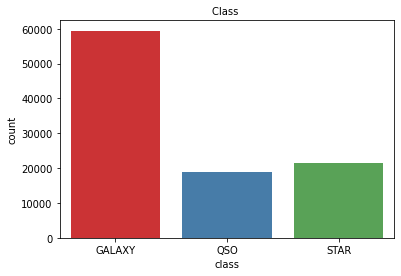

In [6]:
sns.countplot(x = df["class"], palette="Set1")
plt.title("Class ",fontsize=10)
plt.show()


\Galaxy - 0, Star - 1 , QSO - 2
 class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64


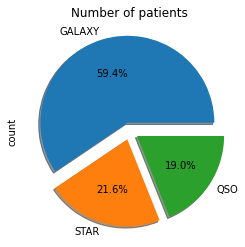

In [7]:
print ("\n\Galaxy - 0, Star - 1 , QSO - 2\n", df["class"].value_counts());
df["class"].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('Number of patients');

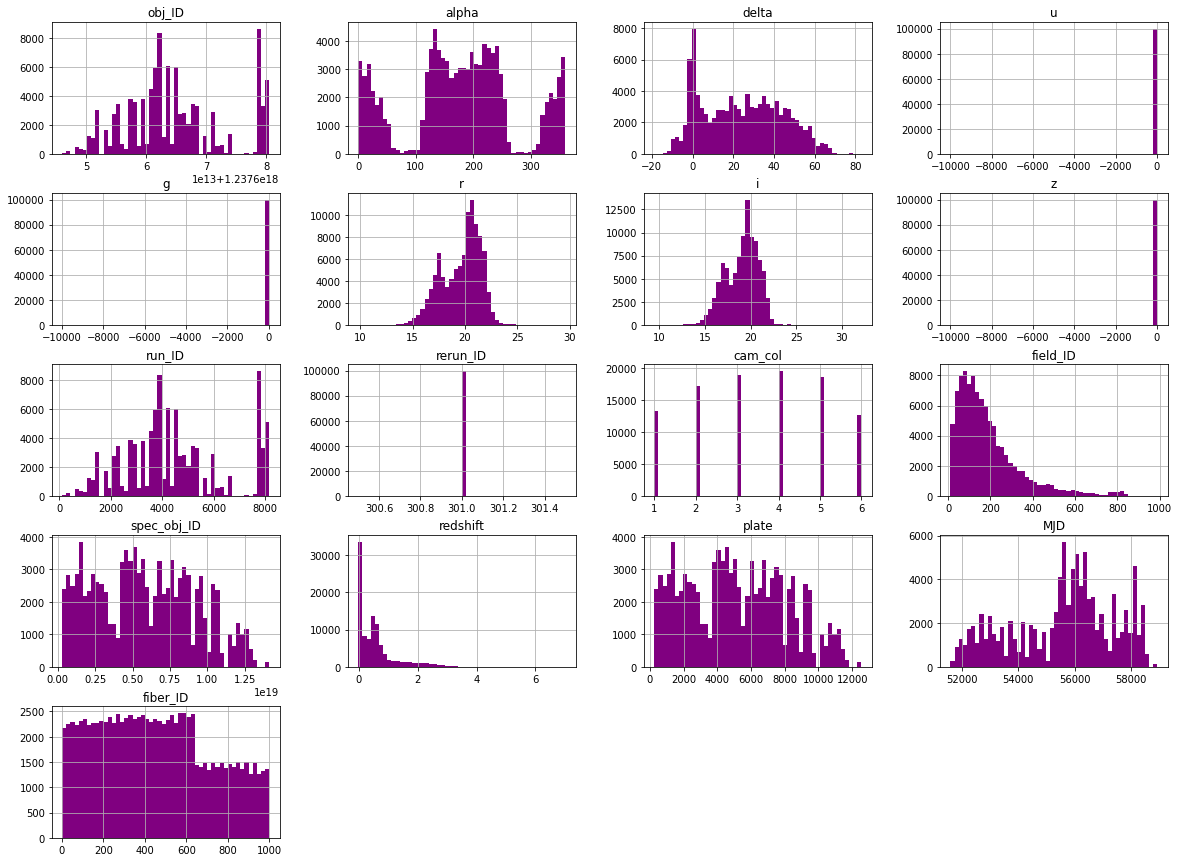

In [8]:
df.hist(bins=50,figsize=(20,15), color='purple')
plt.show()

Histogramlar, veri setindeki her bir değişkenin dağılımını ve yoğunluklarını görsel olarak gösterir. Bu dağılımlar, verileri daha iyi anlamaya ve önemli özellikleri tanımlamaya yardımcı olabilir.

In [9]:
df = df.drop(['obj_ID','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis = 1) 

Burada ihtiyacım olmayan gereksiz parametreleri siliyorum. Yani ID'ler makine öğrenmesi için bir katkı sağlamıyor. Kolon sayısı da bununla birlikte 12'ye düşüyor.

In [10]:
df['class'] = df['class'].map({'GALAXY': 0, 'STAR': 1, 'QSO': 2})

Bu kod, 'class' sütunundaki kategorik etiketleri sayısal değerlere dönüştürmek için kullanılır.  'GALAXY' etiketine 0, 'STAR' etiketine 1 ve 'QSO' etiketine 2 atar.

In [11]:
display(df.corr().style.background_gradient(cmap='coolwarm',axis = None))
plt.figure(figsize=(10, 8))
print(df.isnull().sum())


,alpha,delta,u,g,r,i,z,spec_obj_ID,class,redshift,plate,MJD
alpha,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,-0.002553,0.004552,0.001667,-0.002554,0.019943
delta,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,0.112329,0.056643,0.031638,0.112329,0.107333
u,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.029997,-0.017701,0.014309,0.029997,0.031997
g,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.039443,-0.005915,0.022954,0.039443,0.040274
r,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.655245,0.150691,0.433241,0.655243,0.671180
i,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.661641,0.284396,0.492383,0.661640,0.672523
z,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.037813,0.017352,0.030380,0.037813,0.037469
spec_obj_ID,-0.002553,0.112329,0.029997,0.039443,0.655245,0.661641,0.037813,1.000000,0.215722,0.388642,1.000000,0.970167
class,0.004552,0.056643,-0.017701,-0.005915,0.150691,0.284396,0.017352,0.215722,1.000000,0.536822,0.215722,0.207262
redshift,0.001667,0.031638,0.014309,0.022954,0.433241,0.492383,0.030380,0.388642,0.536822,1.000000,0.388641,0.387109


alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
dtype: int64


<Figure size 720x576 with 0 Axes>

Bu kod, bir veri setindeki sayısal özellikler arasındaki ilişkileri inceleyerek korelasyon matrisini hesaplar ve ardından renk gradyanlarıyla görselleştirir. Ayrıca, veri setindeki her bir sütunda bulunan eksik değerlerin sayısını gösterir. Bu işlemler, veri setinin genel özelliklerini anlamak ve eksik değerlerin tespit edilmesi için kullanılır.

# Makine Öğrenmesi

In [12]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, StratifiedKFold

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report
from tabulate import tabulate
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import RandomizedSearchCV, train_test_split

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import matthews_corrcoef
from scipy.stats import randint

In [15]:
X = df.drop('class',axis=1)
Y = df['class']

df'den "class" sütununu çıkararak X adında yeni bir DataFrame oluşturur. Daha sonra, "class" sütununu Y adında bir Seri olarak seçer.

Şu adımları gerçekleştirir:
 
<span style="font-size:larger;"> **df.drop('class', axis=1):** <span style="font-size:smaller;"> DataFrame içindeki "class" sütununu (axis=1 ile belirtilir) çıkarır ve geriye kalan sütunları içeren yeni bir DataFrame olan X oluşturur. Yani, X, "class" sütununu içermeyen df'den türetilir.
df['class']: "class" sütununu seçer ve bu sütunu Y olarak atar. Yani, Y, orijinal DataFrame olan df'in "class" sütununu temsil eder.

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
print(X.shape)
print(Y.shape)

(100000, 11)
(100000,)


Eğitim ve test verilerini ayırmak için bu kodu kullandım.

<span style="font-size:larger;"> **train_test_split(X, Y, test_size=0.2, random_state=0):** <span style="font-size:smaller;">  Bu fonksiyon, girdi veri kümesini (X) ve hedef değişkenini (Y) alır ve bunları belirtilen test boyutuna göre eğitim ve test setlerine böler. test_size=0.2 parametresi, test setinin oranını belirtir; burada, veri setinin %20'si test seti olarak ayrılır. random_state=0 parametresi, bölme işleminin tekrarlanabilirliğini sağlar, yani her çalıştırıldığında aynı bölme yapılır.

In [17]:
def best_model(X, Y, models):
    results = {}
    for number, model in models.items():
      if number == 'Logistic regression':
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
      scores = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
      results[number] = scores.mean()

    best = max(results, key=results.get)
    return best, results

models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic regression': LogisticRegression(max_iter=1000),
    'Decision tree': DecisionTreeClassifier()
}

best, results = best_model(X_train, Y_train, models)

print("Model results:")
for model, score in results.items():
    print(f"{model}: {score}")

print(f"\nThe best model is: {best}")

Model results:
Random Forest: 0.978875
Logistic regression: 0.9557625
Decision tree: 0.9653749999999999

The best model is: Random Forest


En iyi modelin Random Forrest olduğunu gösteriyor.

# Random Forest Classifier

***Random Forest***, ensemble öğrenme yöntemlerinden biridir ve genellikle sınıflandırma ve regresyon problemlerinde kullanılır. Random Forest, birden çok karar ağacını (decision tree) kullanarak bir model oluşturur ve bu ağaçların tahminlerini bir araya getirerek daha güçlü ve stabil bir tahmin sağlar.

In [18]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=2, random_state=0)

Bu kod, scikit-learn kütüphanesinden RandomForestClassifier sınıfını kullanarak bir rastgele orman sınıflandırıcı modeli oluşturur ve eğitir.

 <span style="font-size:larger;"> ***RandomForestClassifier(max_depth=2, random_state=0) :*** <span style="font-size:smaller;">  Bu satır, RandomForestClassifier sınıfından bir model oluşturur. max_depth parametresi, her bir karar ağacının maksimum derinliğini belirler. Burada, her bir ağaç en fazla 2 seviye derinliğe sahip olacaktır. random_state parametresi, rastgele sayı üreteci için bir tohum değerini belirler, böylece modelin tekrarlanabilir olmasını sağlar.

In [19]:
Y_pred = clf.predict(X_test)
Y_pred

array([0, 2, 0, ..., 0, 0, 1])

<span style="font-size:larger;"> ***clf.predict(X_test) :*** <span style="font-size:smaller;"> Bu satır, clf adlı bir sınıflandırıcı modelini kullanarak X_test veri seti üzerinde tahminler yapar. X_test, test veri setindeki özellikleri içerir. Model, bu özellikleri kullanarak her bir veri noktasının sınıfını tahmin eder.
Y_pred: Bu tahminler, Y_pred adlı bir dizi olarak saklanır. Her bir tahmin, test veri setindeki bir örneğin sınıfını temsil eder. Yani, Y_pred dizisi, modelin test veri seti üzerindeki sınıf tahminlerini içerir.

Train set score (Accuracy) = 0.8915
Test set score (Accuracy) = 0.8928
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     11851
           1       0.98      0.95      0.96      4314
           2       0.93      0.57      0.70      3835

    accuracy                           0.89     20000
   macro avg       0.92      0.83      0.86     20000
weighted avg       0.90      0.89      0.89     20000



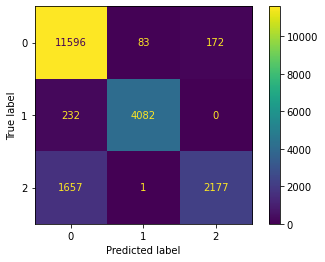

In [25]:
print("Train set score (Accuracy) =", clf.score(X_train, Y_train).round(4))
print("Test set score (Accuracy) =", clf.score(X_test, Y_test).round(4))


print(classification_report(Y_test, clf.predict(X_test)))
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)
plt.show()

* <span style="font-size:larger;"> ***precision :*** <span style="font-size:smaller;"> Bu, bir sınıfın tüm tahmin edilen pozitifler arasındaki doğru pozitiflerin oranını ifade eder. Yani, bir sınıfa ait olarak tahmin edilen örneklerin ne kadarının gerçekten o sınıfa ait olduğunu gösterir.
* <span style="font-size:larger;"> ***recall :*** <span style="font-size:smaller;"> Bu, bir sınıfa ait tüm gerçek pozitifler arasındaki doğru pozitiflerin oranını ifade eder. Yani, bir sınıfa ait tüm gerçek örneklerin ne kadarının doğru bir şekilde tahmin edildiğini gösterir.
* <span style="font-size:larger;"> ***f1-score :*** <span style="font-size:smaller;"> Bu, "precision" ve "recall" metriklerinin harmonik ortalamasını ifade eder. Düşük "precision" ve "recall" değerlerine sahip bir model, düşük bir f1-score'a sahip olabilir, çünkü bu iki metrik arasındaki dengesizliği gösterir.
* <span style="font-size:larger;"> ***support :*** <span style="font-size:smaller;">  Bu, her bir sınıf için test veri setinde bulunan örnek sayısını ifade eder.
* <span style="font-size:larger;"> ***accuracy :*** <span style="font-size:smaller;">  Bu, doğru olarak sınıflandırılan örneklerin toplam örnek sayısına oranını ifade eder. Yani, doğru tahmin edilen örneklerin toplam örnek sayısına oranını ifade eder.
* <span style="font-size:larger;"> ***macro avg :*** <span style="font-size:smaller;">  Bu, tüm sınıfların metriklerinin aritmetik ortalamasını ifade eder. Her sınıfın ağırlığının eşit olduğu varsayılır.
* <span style="font-size:larger;"> ***weighted avg :*** <span style="font-size:smaller;"> Bu, tüm sınıfların metriklerinin ağırlıklı ortalamasını ifade eder. Her bir sınıfın örnek sayısına göre ağırlıklıdır.

## Random Forest İçin Sonuçlar

* Modelimizin train seti doğruluk oranı 0.8915 ve test seti doğruluk oranı 0.8928 olarak belirlenmiştir, bu da modelin verilere iyi bir şekilde genelleştirme yeteneğine sahip olduğunu göstermektedir.
 
* Sınıf 0 (Galaksi) için precision ve recall sırasıyla 0.86 ve 0.98 olarak yüksek bulunmuştur, ancak sınıf 2 (Kuasar) için bu değerler 0.93 ve 0.57 olarak belirlenmiştir, modelin sınıf 2'yi diğerlerine göre daha zor sınıflandırdığını göstermektedir.
 
* Sınıf 1 (Yıldız) için yüksek bir precision değeri (0.98) elde edilmiş olmasına rağmen, recall değeri biraz daha düşük olarak belirlenmiştir (0.95), bu da modelin bazı sınıf 1 örneklerini kaçırdığını göstermektedir.
 
* F1-score değerleri genel olarak yüksek bulunmuş olup, sınıf 2'nin düşük recall değeri modelin sınıflar arasında dengesizlik olduğunu göstermektedir.
 
* Sonuç olarak, modelimiz genel olarak iyi bir performans sergilemiştir ancak özellikle sınıf 2'nin sınıflandırılmasında iyileştirmeler yapılması gerekmektedir. 

# Random Forest İçin Hiperparametre Optimizasyonu

## Hiperparametre Optimizasyonu

Hiperparametre optimizasyonu, makine öğrenimi algoritmalarında kullanılan hiperparametrelerin en iyi değerlerini bulma sürecidir. Hiperparametreler, modelin yapılandırılmasını ve eğitim sürecini kontrol eden ayarlar ve parametrelerdir. Genellikle modelin performansını etkilerler.

Hiperparametre optimizasyonu, genellikle bir arama stratejisi kullanılarak yapılır. Bu stratejilerden bazıları:



* Grid Search: Belirli bir hiperparametre aralığını belirleyip, bu aralık içinde tüm kombinasyonları deneyerek en iyi performansı sağlayan hiperparametre setini bulma yöntemidir. Grid search, tüm kombinasyonları sistemli bir şekilde deneyerek arama yapar.
* Randomized Search: Grid search'e kıyasla daha etkili bir arama stratejisidir. Belirli bir hiperparametre aralığını belirler ve bu aralık içinden rastgele örnekler seçerek denemeler yapar. Bu, daha az hesaplama maliyetiyle daha iyi sonuçlar elde etmeyi sağlar.
* Bayesian Optimization: Geçmiş denemelerden elde edilen bilgilere dayanarak gelecekteki denemeleri yönlendiren bir optimize edici yaklaşımdır. Bu yöntem, daha az denemeyle daha iyi sonuçlar elde etmeyi amaçlar.

In [41]:
rf_clf = RandomForestClassifier()


param_dist = {
    'n_estimators':(10, 200,40),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': (1,100,30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(rf_clf, param_distributions=param_dist, n_iter=6, cv=3, scoring='accuracy', random_state=42)
random_search.fit(X_train, Y_train)

print("En iyi parametreler:", random_search.best_params_)
print("En iyi model:", random_search.best_estimator_)

y_pred = random_search.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Test seti doğruluğu:", accuracy)

En iyi parametreler: {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 40}
En iyi model: RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=5, n_estimators=40)
Test seti doğruluğu: 0.97805


***n_estimators:*** Random Forest'de kullanılacak ağaç sayısıdır. Burada, 10 ile 200 arasında rastgele bir sayı seçilir.

***max_features:*** Her bir ağaçta kullanılacak maksimum özellik sayısıdır. ['auto', 'sqrt', 'log2'] değerlerinden biri seçilir. 'auto' seçeneği, özelliklerin tümünü kullanırken, 'sqrt' seçeneği karekökünü ve 'log2' seçeneği ise logaritmasını alır.

***max_depth:*** Her bir ağacın maksimum derinliğini belirtir. None seçeneği, ağaçların maksimum derinlik kısıtlaması olmadan büyümesine izin verir.

***min_samples_split:*** Bir düğümün bölünmesi için gerekli minimum örnek sayısını belirtir. 2 ile 10 arasında rastgele bir sayı seçilir.

***min_samples_leaf:*** Bir yaprak düğümünde olması gereken minimum örnek sayısını belirtir. 1 ile 10 arasında rastgele bir sayı seçilir.

***bootstrap:*** Veri setinin rastgele alt kümelerinin oluşturulup oluşturulmayacağını belirtir. True ise bootstrap örnekleme yapılır, False ise bootstrap yapılmaz.


# SONUÇ

Random Forest yaptığımda test seti doğruluğum 0.89 çıkmıştı bunun üzerine hiperparametre optimizasyonu yaptığımda bu sonuç 0.97'ye kadar yükseldi. Bu benim için olumlu bir sonuç

En başta kıyasladığım 3 sınıflama dışında bir de Bagging Classifier yapmak istedim ve daha iyi bir sonuç elde ettim bundan sonraki bölümde görünüyor.

# Bagging Classifier

***Bagging (Bootstrap Aggregating)***, ensemble öğrenme yöntemlerinden biridir ve genellikle sınıflandırma problemleri için kullanılır. Bagging Classifier, birden çok temel modelin (genellikle karar ağaçları) bir araya getirilmesiyle bir model oluşturur. Bu temel modeller, rastgele alt kümeler üzerinde eğitilir ve ardından tahminlerin bir araya getirilerek genellenebilir bir model elde edilir.

In [22]:
from sklearn.ensemble import BaggingClassifier
clf2 = BaggingClassifier().fit(X_train,Y_train)

In [23]:
Y_pred2 = clf2.predict(X_test)

Train set score (Accuracy) = 0.9975
Test set score (Accuracy) = 0.977
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11851
           1       1.00      1.00      1.00      4314
           2       0.96      0.92      0.94      3835

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


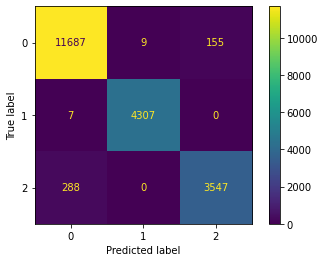

In [31]:
from sklearn.metrics import plot_confusion_matrix
print("Train set score (Accuracy) =", clf2.score(X_train, Y_train).round(4))
print("Test set score (Accuracy) =", clf2.score(X_test, Y_test).round(4))

Y_pred2 = clf2.predict(X_test)
print (classification_report (Y_test, Y_pred2))
plot_confusion_matrix(clf2, X_test, Y_test);

## Bagging Classifier İçin Sonuçlar

* Sınıf 0 (Galaksi) için precision ve recall değerlerinin yüksek olduğunu görüyoruz (sırasıyla 0.98 ve 0.99). Bu, modelin sınıf 0'ı neredeyse mükemmel bir şekilde sınıflandırdığını gösteriyor.
* Sınıf 1 (Yıldız) için precision ve recall değerleri her ikisi de mükemmel olarak hesaplanmış (1.00). Bu, modelin sınıf 1'i mükemmel bir şekilde sınıflandırdığını gösteriyor.
* Sınıf 2 (Kuasar) için precision değeri yüksek (0.96), ancak recall değeri biraz daha düşüktür (0.92). Bu, modelin sınıf 2'yi iyi bir şekilde sınıflandırdığını ancak bazı örnekleri kaçırdığını gösteriyor.

#  Model Testi

Modelimi test etmek için literatürde bulunan galaksi, yıldız ve kuasarlardan birer tane seçtim ve testini yaptım

## Aldebaran Star

In [46]:
data = {
    'u': [4.32],
    'r': [-0.37],
    'i': [-1.31],
    'delta': [0.28],
    'alpha': [0.07],
    'redshift' : 0.000181
}

# DataFrame oluşturma
df_1 = pd.DataFrame(data)


(df_1)

,u,r,i,delta,alpha,redshift
0,4.32,-0.37,-1.31,0.28,0.07,0.000181


In [47]:
X_train = df[['u', 'r', 'i', 'delta', 'alpha', 'redshift']]
Y_train = df['class']

model = BaggingClassifier()
model.fit(X_train, Y_train)

BaggingClassifier()

In [49]:
X_test = df_1[['u', 'r', 'i', 'delta', 'alpha' ,'redshift']]
prediction = model.predict(X_test)
print(prediction)

[1]


Bulması gerektiği gibi yıldız değerini ifade eden 1'i buldu.

## M 90 Galaxy

In [50]:
data2 = {
    'u': [4.32],
    'r': [-0.37],
    'i': [-1.31],
    'delta': [0.28],
    'alpha': [0.07],
    'redshift': [0.006]
}

df_2 = pd.DataFrame(data2)

df_2

,u,r,i,delta,alpha,redshift
0,4.32,-0.37,-1.31,0.28,0.07,0.006


In [51]:
X_train = df[['u', 'r', 'i', 'delta', 'alpha', 'redshift']]
Y_train = df['class']

model = BaggingClassifier()
model.fit(X_train, Y_train)

BaggingClassifier()

In [52]:
X_test = df_2[['u', 'r', 'i', 'delta', 'alpha' ,'redshift']]
prediction = model.predict(X_test)
print(prediction)

[0]


Bulması gerektiği gibi galaksi değerini ifade eden 0'ı buldu

## 3C 273 QSO

In [53]:
data3 = {
    'u': [13.859],
    'r': [12.871],
    'i': [12.630],
    'delta': [1.12],
    'alpha': [5.06],
    'redshift' : [0.15756751]
    
}

df_3 = pd.DataFrame(data3)

df_3

,u,r,i,delta,alpha,redshift
0,13.859,12.871,12.63,1.12,5.06,0.157568


In [54]:
X_train = df[['u', 'r', 'i', 'delta', 'alpha','redshift']]
y_train = df['class']

model = BaggingClassifier()
model.fit(X_train, y_train)

BaggingClassifier()

In [55]:
X_test = df_3[['u', 'r', 'i', 'delta', 'alpha','redshift' ]]
prediction = model.predict(X_test)
print(prediction)

[2]


Bulması gerektiği gibi kuasar değerini ifade eden 2'yi buldu.